# EDA

In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split

bank_df = pd.read_csv("/workspaces/logistic-regression-project-tutorial-pilarzarco/data/raw/bank-marketing-campaign-data.csv", sep = ";")
bank_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [48]:
bank_df.shape

(41188, 21)

In [49]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [50]:
# Eliminar duplicados
bank_df = bank_df.drop_duplicates().reset_index(drop = True)
bank_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [51]:
# Contar cuántas veces aparece "nonexistent" en la columna 'poutcome'
non_existent = (bank_df['poutcome'] == "nonexistent").sum()
non_existent

# Decido eliminarla ya que no aporta datos suficientes
bank_df = bank_df.drop(["poutcome"], axis=1, inplace=False)
bank_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no


## 1. Análisis de variables univariante

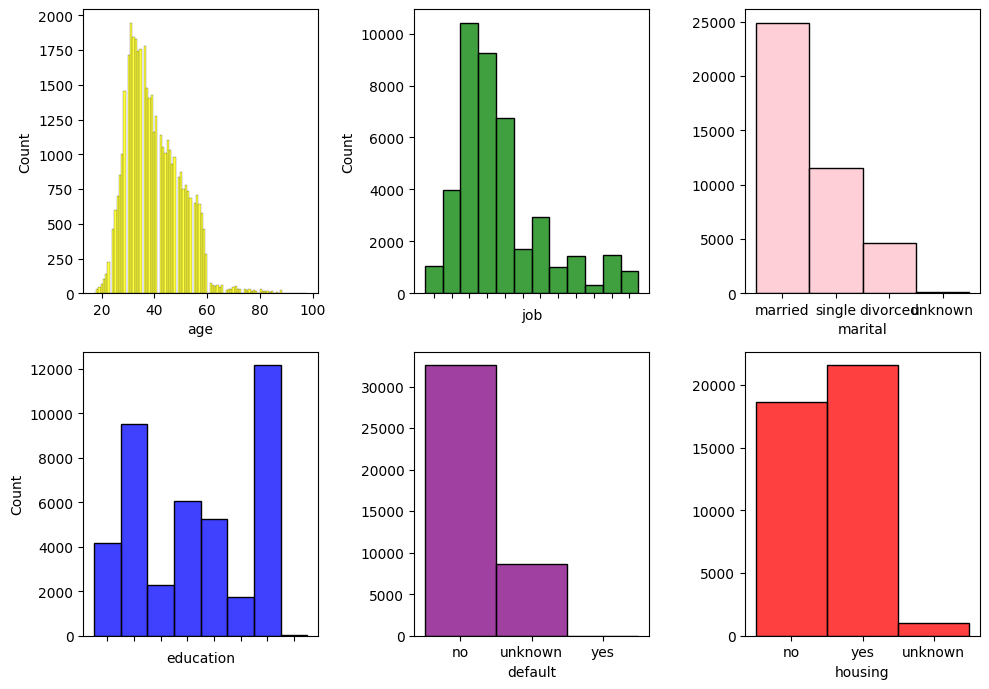

In [52]:
# Hacemos el análisis univariante de todas las variables
import seaborn as sns
import matplotlib.pyplot as plt

fig, axis= plt.subplots(2, 3, figsize=(10, 7))

sns.histplot(ax=axis[0, 0], data=bank_df, x="age", color="yellow")
sns.histplot(ax=axis[0, 1], data=bank_df, x="job", color="green").set_xticklabels([])
sns.histplot(ax=axis[0, 2], data=bank_df, x="marital", color="pink").set(ylabel=None)
sns.histplot(ax=axis[1, 0], data=bank_df, x="education", color="blue").set_xticklabels([])
sns.histplot(ax=axis[1, 1], data=bank_df, x="default", color="purple").set(ylabel=None)
sns.histplot(ax=axis[1, 2], data=bank_df, x="housing", color="red").set(ylabel=None)

plt.tight_layout()
plt.show()

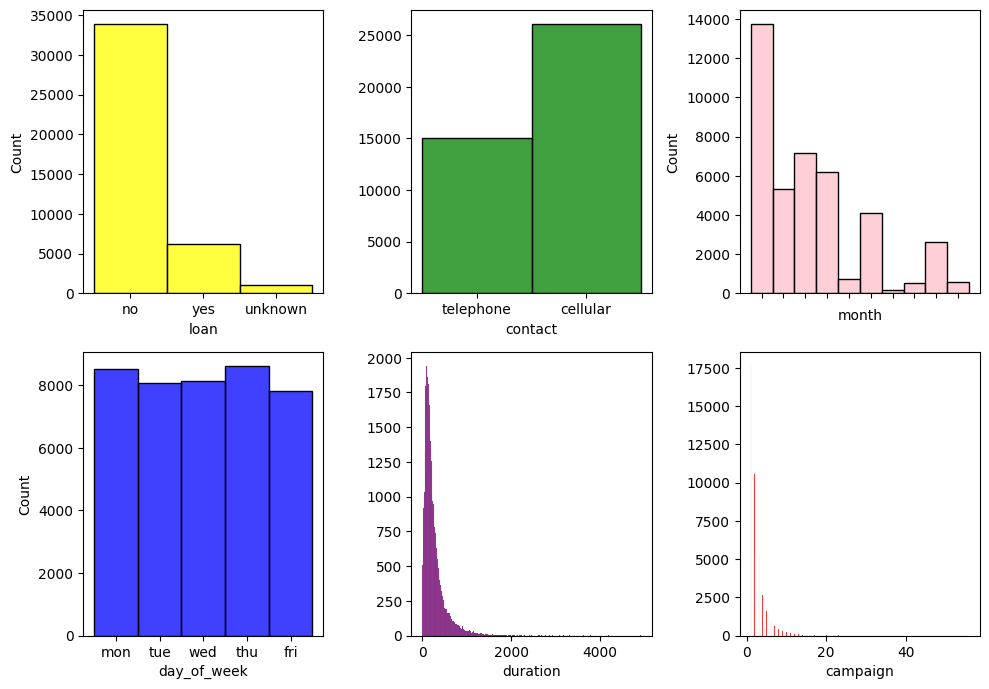

In [53]:
fig, axis= plt.subplots(2, 3, figsize=(10, 7))

sns.histplot(ax=axis[0, 0], data=bank_df, x="loan", color="yellow")
sns.histplot(ax=axis[0, 1], data=bank_df, x="contact", color="green").set(ylabel=None)
sns.histplot(ax=axis[0, 2], data=bank_df, x="month", color="pink").set_xticklabels([])
sns.histplot(ax=axis[1, 0], data=bank_df, x="day_of_week", color="blue")
sns.histplot(ax=axis[1, 1], data=bank_df, x="duration", color="purple").set(ylabel=None)
sns.histplot(ax=axis[1, 2], data=bank_df, x="campaign", color="red").set(ylabel=None)

plt.tight_layout()
plt.show()

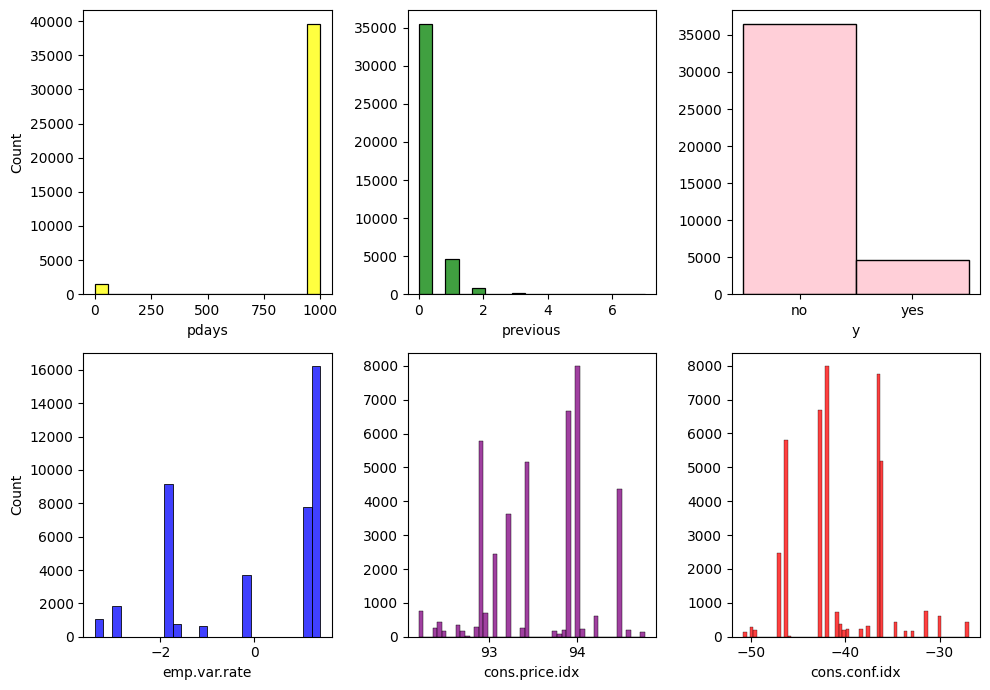

In [54]:
fig, axis= plt.subplots(2, 3, figsize=(10, 7))

sns.histplot(ax=axis[0, 0], data=bank_df, x="pdays", color="yellow")
sns.histplot(ax=axis[0, 1], data=bank_df, x="previous", color="green").set(ylabel=None)
sns.histplot(ax=axis[0, 2], data=bank_df, x="y", color="pink").set(ylabel=None)
sns.histplot(ax=axis[1, 0], data=bank_df, x="emp.var.rate", color="blue")
sns.histplot(ax=axis[1, 1], data=bank_df, x="cons.price.idx", color="purple").set(ylabel=None)
sns.histplot(ax=axis[1, 2], data=bank_df, x="cons.conf.idx", color="red").set(ylabel=None)

plt.tight_layout()
plt.show()

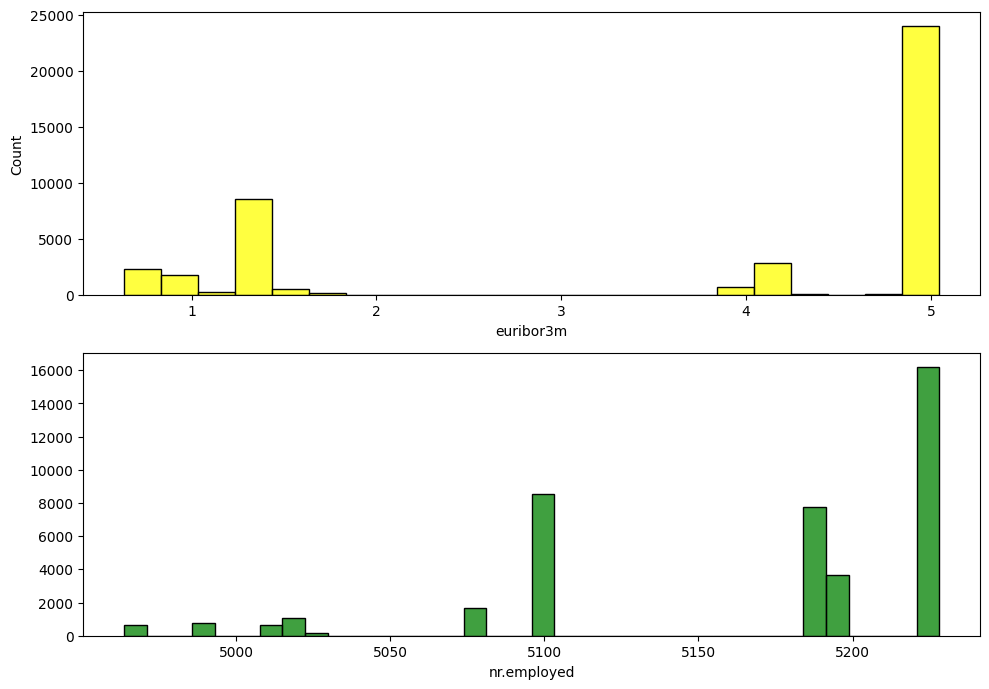

In [55]:
fig, axis= plt.subplots(2, figsize=(10, 7))

sns.histplot(ax=axis[0], data=bank_df, x="euribor3m", color="yellow")
sns.histplot(ax=axis[1], data=bank_df, x="nr.employed", color="green").set(ylabel=None)


plt.tight_layout()
plt.show()

## 2. Análisis de variables multivariante

<Axes: xlabel='loan', ylabel='count'>

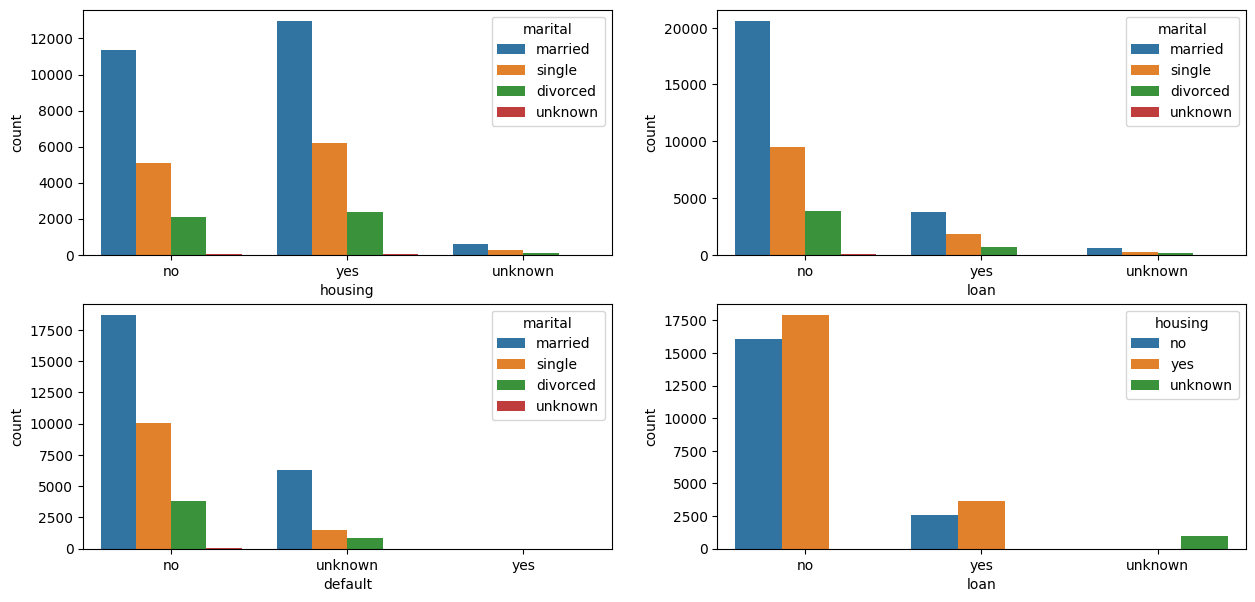

In [56]:
# Análisis Categórico-categórico
fig, axis = plt.subplots(2, 2, figsize = (15, 7))

sns.countplot(ax = axis[0, 0], data = bank_df, x = "housing", hue = "marital")
sns.countplot(ax = axis[0, 1], data = bank_df, x = "loan", hue = "marital")
sns.countplot(ax = axis[1, 0], data = bank_df, x = "default", hue = "marital")
sns.countplot(ax = axis[1, 1], data = bank_df, x = "loan", hue = "housing")


* Podemos concluir que la mayor parte de los clientes estan casados, seguidos por los solteros y divorciados.
* Los casados y solteros tienen una mayor proporción de vivienda que los divorciados.
* Se puede concluir que la mayoría de los clientes tienen una vivienda, seguidos por los que no la tienen.
* Dentro de cada categoría, se puede concluir que los clientes que tienen una vivienda tienen una menor proporción de préstamo que los que no la tienen.
* Se puede concluir que la mayoría de los clientes no tienen un préstamo, seguidos por los que sí lo tienen.
* Esta variable indica si los clientes han incumplido o no su crédito. Se puede concluir que la mayoría de los clientes no han incumplido.

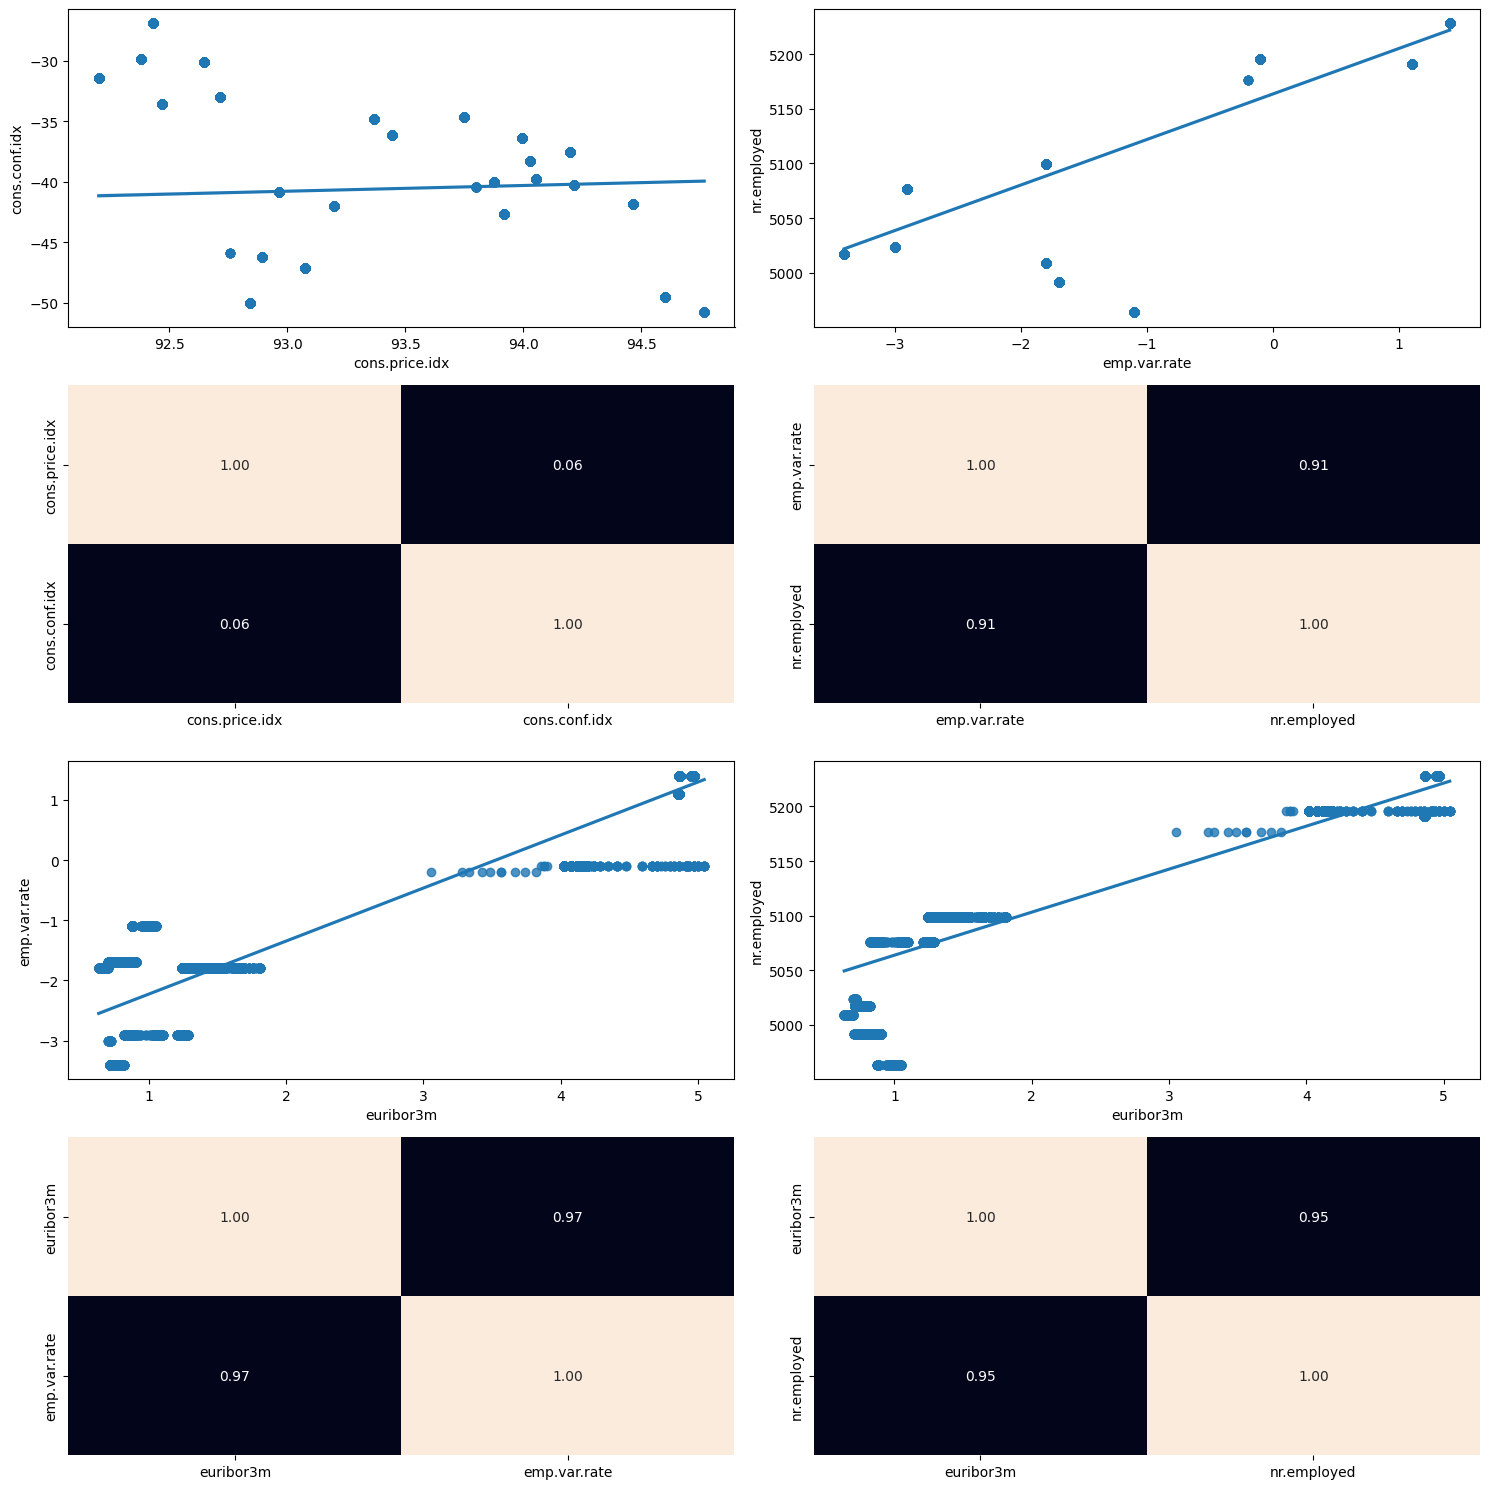

In [57]:
# Análisis numérico-numérico
fig, axis = plt.subplots(4, 2, figsize = (15, 15))


sns.regplot(ax = axis[0, 0], data = bank_df, x = "cons.price.idx", y = "cons.conf.idx")
sns.heatmap(bank_df[["cons.price.idx", "cons.conf.idx"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = bank_df, x = "emp.var.rate", y = "nr.employed")
sns.heatmap(bank_df[["emp.var.rate", "nr.employed"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1], cbar = False)

sns.regplot(ax = axis[2, 0], data = bank_df, x = "euribor3m", y = "emp.var.rate")
sns.heatmap(bank_df[["euribor3m", "emp.var.rate"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0], cbar = False)

sns.regplot(ax = axis[2, 1], data = bank_df, x = "euribor3m", y = "nr.employed")
sns.heatmap(bank_df[["euribor3m", "nr.employed"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 1], cbar = False)

plt.tight_layout()
plt.show()


* El 0.95 de correlación entre 'nr.employed' y 'euribor3m' significa que estas dos variables tienen una relación lineal muy fuerte y positiva. Esto quiere decir que cuando una variable aumenta, la otra también lo hace, y cuando una variable disminuye, la otra también lo hace. El valor de 0.95 indica que el 95% de la variación de una variable se explica por la variación de la otra. Por ejemplo, si el número de empleados sube, el tipo de interés interbancario también sube, y viceversa. Esto puede deberse a que ambas variables están relacionadas con el contexto económico y social del país.
* El 0.91 entre 'emp.var.rate' y 'nr.employed' significa que estas dos variables tienen una relación lineal muy fuerte y positiva. El valor de 0.91 indica que el 91% de la variación de una variable se explica por la variación de la otra. Por ejemplo, si el índice de variación del empleo sube, el número de empleados también sube, y viceversa. 
* La correlación entre 'emp.var.rate' y 'euribor3m' es de 0.95, lo que significa que el 95% de la variación de una variable se explica por la variación de la otra. Si el índice de variación del empleo sube, el tipo de interés interbancario también sube, y viceversa.

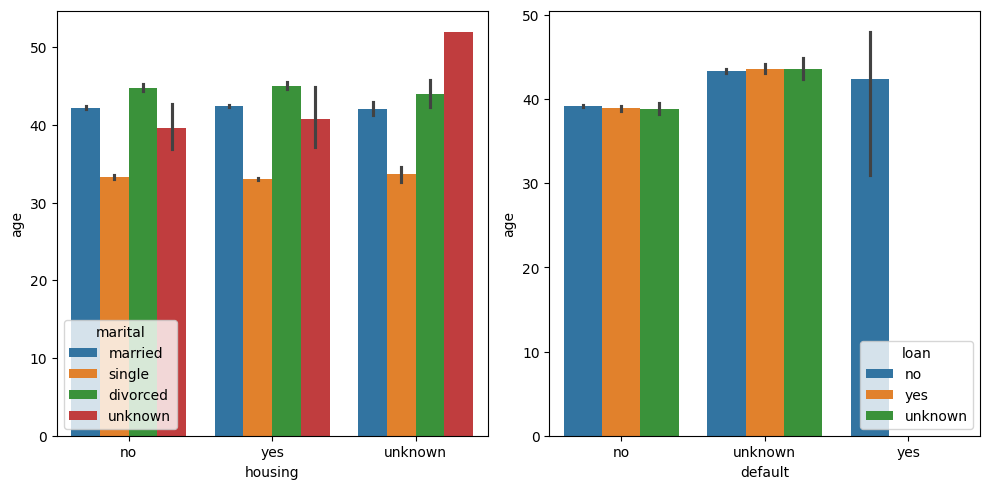

In [58]:
# Relacionamos varias predictoras
fig, axis = plt.subplots(figsize = (10, 5), ncols = 2)

sns.barplot(ax = axis[0], data = bank_df, x = "housing", y = "age", hue = "marital")
sns.barplot(ax = axis[1], data = bank_df, x = "default", y = "age", hue = "loan")

plt.tight_layout()

plt.show()

*  Se puede observar que la mayoría de las personas tienen entre 30 y 40 años, independientemente de su estado civil y su situación de vivienda. También se puede ver que las personas casadas y solteras tienen una mayor proporción de vivienda que las divorciadas y las desconocidas.
*  El segundo muestra la edad de las personas que tienen o no un préstamo personal o con situación de préstamo desconocida. Se puede observar que la mayoría de las personas no tienen préstamo, y que la edad media de estas personas es menor que la de las que tienen préstamo. También se puede ver que hay muy pocas personas con situación de préstamo o de incumplimiento desconocida.

In [59]:
# Factorizar variables categóricas
bank_df["job_n"] = pd.factorize(bank_df["job"])[0]
bank_df["marital_n"] = pd.factorize(bank_df["marital"])[0]
bank_df["education_n"] = pd.factorize(bank_df["education"])[0]
bank_df["default_n"] = pd.factorize(bank_df["default"])[0]
bank_df["housing_n"] = pd.factorize(bank_df["housing"])[0]
bank_df["loan_n"] = pd.factorize(bank_df["loan"])[0]
bank_df["contact_n"] = pd.factorize(bank_df["contact"])[0]
bank_df["month_n"] = pd.factorize(bank_df["month"])[0]
bank_df["day_of_week_n"] = pd.factorize(bank_df["day_of_week"])[0]
bank_df["y_n"] = pd.factorize(bank_df["y"])[0]

num_variables_n = ["job_n", "marital_n", "education_n", "default_n", "housing_n", "loan_n", "contact_n", "month_n", "day_of_week_n",
                 "age", "duration", "campaign", "pdays", "previous", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed", "y_n"]

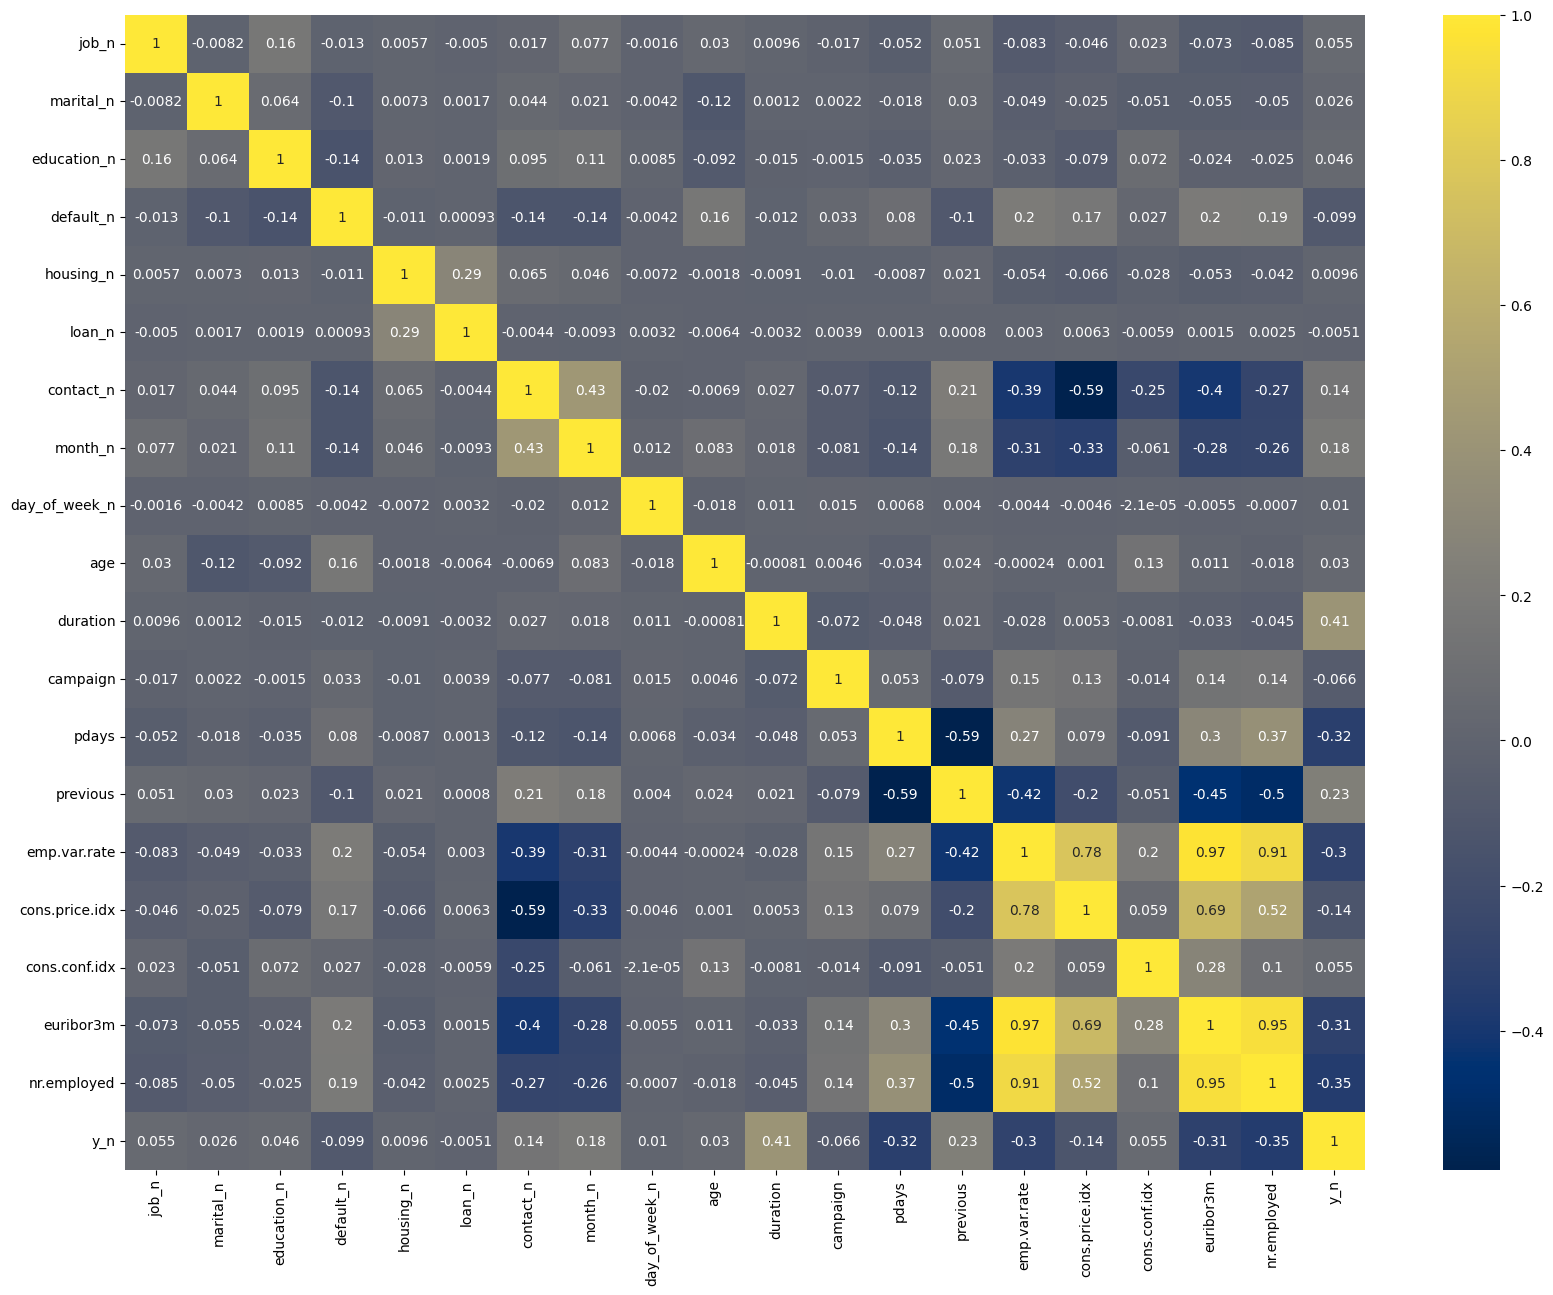

In [60]:
# Mapa de correlación completo
fig, axis = plt.subplots(figsize=(20, 15))

sns.heatmap(bank_df[["job_n", "marital_n", "education_n", "default_n", "housing_n", "loan_n", "contact_n", "month_n", "day_of_week_n",
                 "age", "duration", "campaign", "pdays", "previous", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed", "y_n"]].corr(), annot=True, cmap="cividis")

plt.show()


* Tenemos un mapa de calor débil, con pocas correlaciones.
* Hay mayor número de correlaciones negativas que positivas
* La correlación entre 'previous' y 'pdays' es negativa moderada. Esto significa que, en general, a mayor número de contactos previos, menor número de días desde el último contacto, y viceversa. Esto puede deberse a que los clientes que han sido contactados más veces en el pasado tienen más probabilidad de ser contactados de nuevo en un periodo corto, mientras que los clientes que han sido contactados menos veces en el pasado tienen más probabilidad de ser contactados de nuevo en un periodo largo.
Aunque este dato nu resulta muy relevante.


## 3. Análisis de valores atípicos

In [61]:
# Análisis descriptivo
bank_df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_n,marital_n,education_n,default_n,housing_n,loan_n,contact_n,month_n,day_of_week_n,y_n
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870,3.673863,0.510637,3.277370,0.208908,0.571959,0.199825,0.634714,2.249951,1.979600,0.112663
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364,2.454340,0.696794,2.185558,0.406713,0.541216,0.456055,0.481516,2.429157,1.411539,0.316184
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,3.000000,0.000000,3.000000,0.000000,1.000000,0.000000,1.000000,2.000000,2.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,4.000000,1.000000,6.000000,0.000000,1.000000,0.000000,1.000000,3.000000,3.000000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,11.000000,3.000000,7.000000,2.000000,2.000000,2.000000,1.000000,9.000000,4.000000,1.000000


In [62]:
# Me centro en la informacion de 'campaign' y 'duration'
stats = bank_df[["campaign", "duration"]].describe()
stats

,campaign,duration
count,41176.000000,41176.000000
mean,2.567879,258.315815
std,2.770318,259.305321
min,1.000000,0.000000
25%,1.000000,102.000000
50%,2.000000,180.000000
75%,3.000000,319.000000
max,56.000000,4918.000000


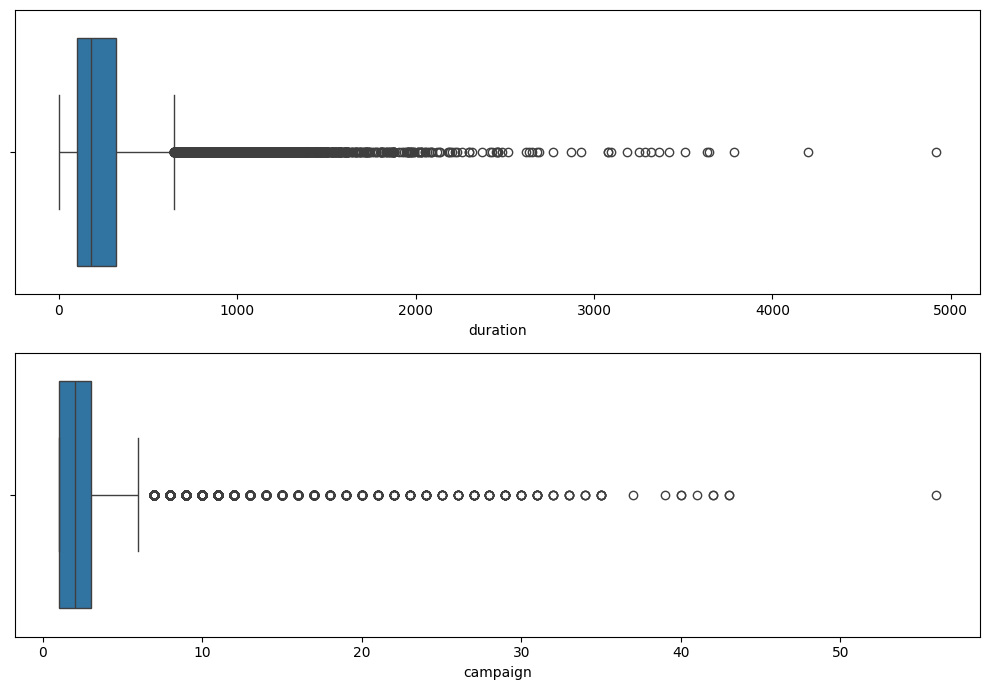

In [63]:
# Análisis de outliers
fig, axis = plt.subplots(2, figsize = (10, 7))

sns.boxplot(ax = axis[0], data = bank_df, x = "duration")
sns.boxplot(ax = axis[1], data = bank_df, x = "campaign")

plt.tight_layout()
plt.show()

In [64]:
# Identificar outliers en 'campaign'
campaign_iqr = stats["campaign"]["75%"] - stats["campaign"]["25%"]
upper_limit = stats["campaign"]["75%"] + 1.5 * campaign_iqr
lower_limit = stats["campaign"]["25%"] - 1.5 * campaign_iqr
print(f"The upper and lower limits for finding outliers in 'campaign' are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(campaign_iqr, 2)}")

# Identificar outliers en 'duration'
duration_iqr = stats["duration"]["75%"] - stats["duration"]["25%"]
upper_limit_dur = stats["duration"]["75%"] + 1.5 * duration_iqr
lower_limit_dur = stats["duration"]["25%"] - 1.5 * duration_iqr
print(f"The upper and lower limits for finding outliers in 'duration' are {round(upper_limit_dur, 2)} and {round(lower_limit_dur, 2)}, with an interquartile range of {round(duration_iqr, 2)}")

The upper and lower limits for finding outliers in 'campaign' are 6.0 and -2.0, with an interquartile range of 2.0
The upper and lower limits for finding outliers in 'duration' are 644.5 and -223.5, with an interquartile range of 217.0


In [65]:
# Ajustamos los outliers a los limites
bank_df.loc[bank_df["campaign"] > upper_limit, "campaign"] = upper_limit
bank_df.loc[bank_df["duration"] > upper_limit_dur, "duration"] = upper_limit_dur.astype(int)

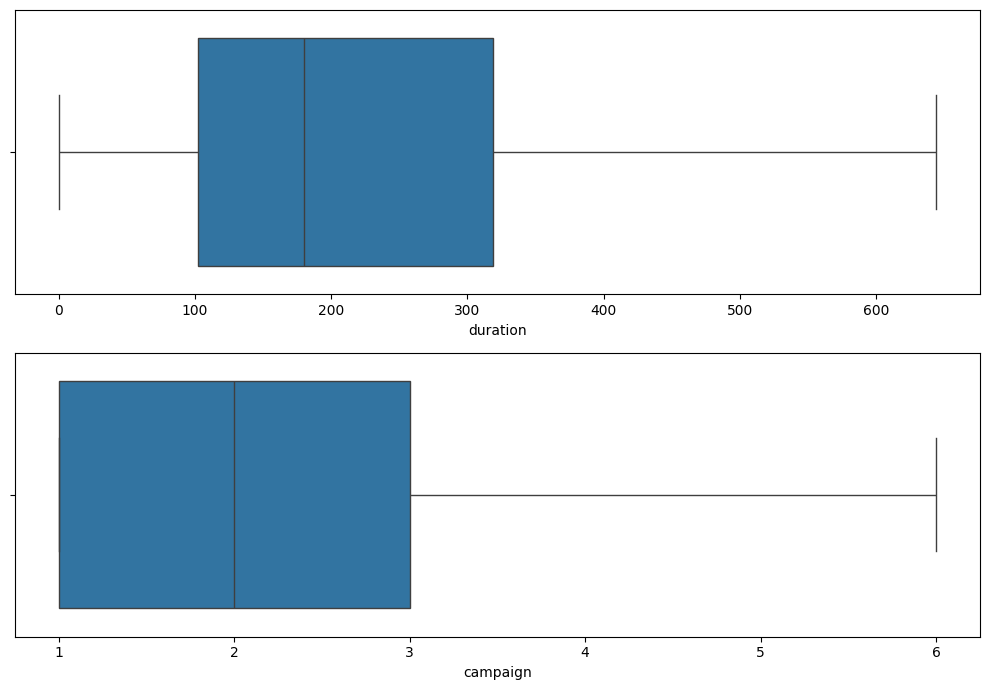

In [66]:
# Verificamos que no tenemos outliers
fig, axis = plt.subplots(2, figsize = (10, 7))

sns.boxplot(ax = axis[0], data = bank_df, x = "duration")
sns.boxplot(ax = axis[1], data = bank_df, x = "campaign")

plt.tight_layout()
plt.show()



In [67]:
# Análisis de valores faltantes
null = bank_df.isnull().sum()
null

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
job_n             0
marital_n         0
education_n       0
default_n         0
housing_n         0
loan_n            0
contact_n         0
month_n           0
day_of_week_n     0
y_n               0
dtype: int64

## 4. Split Train y Test

In [68]:
# from sklearn.model_selection import train_test_split

# X = bank_df.drop(["y_n", "y"], axis = 1)
# y = bank_df["y_n"]

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 71)

# X_train.head()

from sklearn.model_selection import train_test_split

X = bank_df.drop(["y_n", "y"], axis = 1)
y = bank_df["y_n"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 71, stratify = y)

X_train.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,nr.employed,job_n,marital_n,education_n,default_n,housing_n,loan_n,contact_n,month_n,day_of_week_n
5688,44,unemployed,married,basic.6y,no,yes,yes,telephone,may,mon,...,5191.0,7,0,2,0,1,1,0,0,0
60,47,entrepreneur,married,university.degree,unknown,no,no,telephone,may,mon,...,5191.0,10,0,6,1,0,0,0,0,0
12023,37,admin.,single,university.degree,unknown,yes,no,telephone,jun,thu,...,5228.1,2,1,6,1,1,0,0,1,3
24779,52,technician,married,basic.9y,no,yes,no,cellular,nov,tue,...,5195.8,4,0,3,0,1,0,1,5,1
40913,31,technician,single,professional.course,no,yes,no,telephone,oct,tue,...,4963.6,4,1,4,0,1,0,0,4,1


In [69]:
# Guardo SIN ESCALAR

X_train.to_csv("/workspaces/logistic-regression-project-tutorial-pilarzarco/data/processed/bank_train_x.csv", index=False) # PREDICTORAS DE TRAIN
with open ("/workspaces/logistic-regression-project-tutorial-pilarzarco/data/processed/bank_train_y.txt", "w") as f: # TARGET DE TRAIN
    f.write(y_train.to_string(index=False))

X_test.to_csv("/workspaces/logistic-regression-project-tutorial-pilarzarco/data/processed/bank_test_x.csv", index=False)# PREDICTORAS DE TEST
with open ("/workspaces/logistic-regression-project-tutorial-pilarzarco/data/processed/bank_test_y.txt", "w") as f:# TARGET DE TEST
    f.write(y_test.to_string(index=False))


## 5. Escalado de variables

In [70]:
# En este caso utilizaremos MIN-MAX

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scal_features = scaler.fit_transform(bank_df[num_variables_n])
bank_df_scal = pd.DataFrame(scal_features, index = bank_df.index, columns = num_variables_n)
bank_df_scal.head()

,job_n,marital_n,education_n,default_n,housing_n,loan_n,contact_n,month_n,day_of_week_n,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y_n
0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.481481,0.405280,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0
1,0.090909,0.0,0.142857,0.5,0.0,0.0,0.0,0.0,0.0,0.493827,0.231366,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0
2,0.090909,0.0,0.142857,0.0,0.5,0.0,0.0,0.0,0.0,0.246914,0.350932,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0
3,0.181818,0.0,0.285714,0.0,0.0,0.0,0.0,0.0,0.0,0.283951,0.234472,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0
4,0.090909,0.0,0.142857,0.0,0.0,0.5,0.0,0.0,0.0,0.481481,0.476708,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0


In [71]:
# Guardo CON ESCALADO

X_train.to_csv("/workspaces/logistic-regression-project-tutorial-pilarzarco/data/processed/bank_scal_train_x.csv", index=False) # PREDICTORAS DE TRAIN
with open ("/workspaces/logistic-regression-project-tutorial-pilarzarco/data/processed/bank_scal_train_y.txt", "w") as f: # TARGET DE TRAIN
    f.write(y_train.to_string(index=False))

X_test.to_csv("/workspaces/logistic-regression-project-tutorial-pilarzarco/data/processed/bank_scal_test_x.csv", index=False)# PREDICTORAS DE TEST
with open ("/workspaces/logistic-regression-project-tutorial-pilarzarco/data/processed/bank_scal_test_y.txt", "w") as f:# TARGET DE TEST
    f.write(y_test.to_string(index=False))


In [72]:
# Guardamos el SCALER
from pickle import dump
dump(scaler, open ("/workspaces/logistic-regression-project-tutorial-pilarzarco/models/scal_scaler.pk", "wb"))


## 6. Selección de características

In [73]:
# Feature selection SIN ESCALADO

from sklearn.feature_selection import f_classif, SelectKBest

num_variables_n = ["job_n", "marital_n", "education_n", "default_n", "housing_n", "loan_n", "contact_n", "month_n", "day_of_week_n",
                 "age", "duration", "campaign", "pdays", "previous", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed"]

X = bank_df[num_variables_n]
y = bank_df["y_n"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=71)

#  método de F-statistic para la selección de características
selection_model = SelectKBest(f_classif, k=5)
selection_model.fit(X_train, y_train)

ix = selection_model.get_support()

X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns=X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns=X_test.columns.values[ix])

X_train_sel.head()


,duration,pdays,emp.var.rate,euribor3m,nr.employed
0,90.0,999.0,1.1,4.857,5191.0
1,314.0,999.0,1.4,4.961,5228.1
2,175.0,999.0,1.4,4.963,5228.1
3,167.0,999.0,-1.8,1.281,5099.1
4,193.0,999.0,1.4,4.961,5228.1


In [74]:
X_test_sel.head()

,duration,pdays,emp.var.rate,euribor3m,nr.employed
0,108.0,999.0,1.4,4.960,5228.1
1,41.0,999.0,-1.8,1.299,5099.1
2,64.0,999.0,1.4,4.958,5228.1
3,201.0,999.0,-1.1,0.881,4963.6
4,197.0,999.0,1.4,4.959,5228.1


In [75]:
# Feature selection CON ESCALADO
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.model_selection import train_test_split

X = bank_df_scal.drop("y_n", axis = 1)
y = bank_df_scal["y_n"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 71)

selection_scal_model = SelectKBest(chi2, k = 5)
selection_scal_model.fit(X_train, y_train)
ix = selection_scal_model.get_support()
X_train_scal_sel = pd.DataFrame(selection_scal_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_scal_sel = pd.DataFrame(selection_scal_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_scal_sel.head()

,duration,previous,emp.var.rate,euribor3m,nr.employed
0,0.139752,0.0,0.937500,0.957379,0.859735
1,0.487578,0.0,1.000000,0.980957,1.000000
2,0.271739,0.0,1.000000,0.981410,1.000000
3,0.259317,0.0,0.333333,0.146679,0.512287
4,0.299689,0.0,1.000000,0.980957,1.000000


In [76]:
X_test_scal_sel.head()

,duration,previous,emp.var.rate,euribor3m,nr.employed
0,0.167702,0.0,1.000000,0.980730,1.000000
1,0.063665,0.0,0.333333,0.150759,0.512287
2,0.099379,0.0,1.000000,0.980277,1.000000
3,0.312112,0.0,0.479167,0.055996,0.000000
4,0.305901,0.0,1.000000,0.980503,1.000000


In [77]:
X_train_sel["y_n"] = list(y_train)
X_test_sel["y_n"] = list(y_test)

X_train_scal_sel["y_n"] = list(y_train)
X_test_scal_sel["y_n"] = list(y_test)

In [78]:
# Guardamos los dos modelos seleccionados

X_train_sel.to_csv("/workspaces/logistic-regression-project-tutorial-pilarzarco/models/model_train.csv", index = False)
X_test_sel.to_csv("/workspaces/logistic-regression-project-tutorial-pilarzarco/models/model_test.csv", index = False)

X_train_scal_sel.to_csv("/workspaces/logistic-regression-project-tutorial-pilarzarco/models/model_scal_train.csv", index = False)
X_test_scal_sel.to_csv("/workspaces/logistic-regression-project-tutorial-pilarzarco/models/model_scal_test.csv", index = False)